## DON'T RERUN THIS NOTEBOOK!!!


**This is what you'll need to submit on Gradescope:**

1. This notebook, completed.
2. Your data in csv form (as noted in the Data Cleaning section below).
3. Any other code you have written for your project.

# Data cleaning

The first step to data analysis is ensuring that you are focussing on the subset of the data that you have complete information about.

1. Having taken a look at your dataset, what columns and rows have you decided to drop from it? Why?

*A valid reason for dropping a column could be lack of information about the column, lack of a clear understanding of the units of measurement, a general feeling that it does not contain any useful information etc*

If you decided to focus on just a subset of your data please describe why you chose that subset and why you feel the other rows do not matter.

For the datas about cars, excluding super cars, we decided to exclude the columns regarding AWD and RWD in our analysis since while our main focus was on the relationship between other factors and retail price, it appeared that the presence of AWD and RWD had no significant impact on the retail price.


For the data about super cars, we decided not to get rid of any columns or factors. Instead, we got rid of specific types of cars, notably electric cars. This is because electric cars were usually significantly more expensive than normal super cars despite its worse off statistics. There also weren't many electric cars, so they would only pose as outliers

2. If you chose to merge on any additional datasets, include the code for that here.

*Answer in this markdown cell. Add more markdown cells if you want.*

## Exploring the data

Using sorting, groupby etc find out some interesting aspects of the data. Even a short fact counts. For instance, if you were working with population data, you could say that 25% of the world lives in South Asia after you do some group by commands.

In this section of your project try to find as many interesting facts as possible.

* Facts from data of cars excluding super cars:

* For the data about cars, excluding super cars, there are a total of 387 cars, with 234 Sedans, about 60.5% of the total, 59 SUVs, about 15.2% of the total, 45 Sports cars, about 11.6% of the total, 29 Wagons, 7.5% of the total, and 20 Minivans, about 5.2% of the total.

* The average price of Sports Cars is the highest among the different car types, approximately $54394.9.

* On the other hand, the average price of Minivans is the lowest, approximately $27796.5, representing a significant difference in pricing between these two categories.

* According to the frequency distribution with an interval of 10000, the retail price range of 20000 to 30000 had the highest frequency.

* Facts from data of super cars:
* There are a total of 948 super cars excluding hybrids and electric supercars
* Of the 948 cars, there are 169 'unique' car models. There are multiple different variations of each car, this is why there is a total count of 948 cars
* The average cost of a supercar in this dataset is $342,768.95

* Of the 948 cars, only 58 cars that cost over 1 million USD, and 887 cost less than 1 million.
* The average ferrari cost $406,119.4

* whereas the average Bugatti cost $3,251,957


# Visualizations

Make at least 8 visualizations (if this number is unreasonable please talk to your mentoring TA before reducing it) that reveal something interesting about the data. Try to include at least one scatterplot and one histogram/bar graph (again, if the data does not lend itself to these plots do let us know

Make sure that your visualizations
1. Have things like the axes, titles, units etc
2. Are telling a slightly interesting story. Interesting = something a person who has not seen this data might not be able to just guess.

Write a few lines telling us what your visualization represents and what it reveals. Discuss any potential hypotheses that could result from these visualizations.

_Write your answer in this markdown cell._

In [101]:
import pandas as pd
import numpy as np
import math
from torch import nn
import torch
import wandb
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [102]:
cars = pd.read_csv("D://cars.csv")
cars

,Name,Type,AWD,RWD,Retail Price,Dealer Cost,Engine Size (l),Cyl,Horsepower(HP),City Miles Per Gallon,Highway Miles Per Gallon,Weight,Wheel Base,Len,Width
0,Acura 3.5 RL 4dr,Sedan,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
1,Acura 3.5 RL w/Navigation 4dr,Sedan,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
2,Acura MDX,SUV,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
3,Acura NSX coupe 2dr manual S,Sports Car,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
4,Acura RSX Type S 2dr,Sedan,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,Volvo S80 2.9 4dr,Sedan,0,0,37730,35542,2.9,6,208,20,28,3576,110,190,72
383,Volvo S80 T6 4dr,Sedan,0,0,45210,42573,2.9,6,268,19,26,3653,110,190,72
384,Volvo V40,Wagon,0,0,26135,24641,1.9,4,170,22,29,2822,101,180,68
385,Volvo XC70,Wagon,1,0,35145,33112,2.5,5,208,20,27,3823,109,186,73


In [103]:

data=pd.read_csv("D://Sport car price.csv",encoding="latin-1")
def to_num(s):
    ans=""
    for i in s:
        if i!=",":
            ans+=i
    return int(ans)
data["price"]=data["Price (in USD)"].apply(to_num)
def to_num_2(s):
    if s[-1]=="+":
        s=s[:-1]
    ans=""
    for i in s:
        if i!=",":
            ans+=i
    return ans

def love(s):
    if "Electric" in str(s) or "Hybrid" in str(s) or "-" in str(s):
        return
    else:
        return s
data["engine"]=data["Engine Size (L)"].apply(love)
data["horse"]=data["Horsepower"].apply(to_num_2)
data=data.dropna(axis=0)
data=data.rename(columns={'Car Make' : "Manufacturer"})
data

,Manufacturer,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),price,engine,horse
0,Porsche,911,2022,3,379,331,4,"101,200",101200,3,379
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390",274390,5.2,630
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750",333750,3.9,661
3,Audi,R8,2022,5.2,562,406,3.2,"142,700",142700,5.2,562
4,McLaren,720S,2021,4,710,568,2.7,"298,000",298000,4,710
...,...,...,...,...,...,...,...,...,...,...,...
1000,Aston Martin,Vantage,2021,4,503,505,3.6,"146,000",146000,4,503
1001,Bugatti,Chiron,2021,8,1479,1180,2.4,"3,000,000",3000000,8,1479
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000",3000000,5,1280
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000",1000000,4,789


In [104]:
def remove_commas(x):
  return int(x.replace(",", ""))
def into_ints(x):
  if "+" in x:
    return int(x[:-1])
  return int(x)

In [ ]:
cars['Engine Size (l)'][10]=3.0
cars['Cyl'][8]=4
cars['City Miles Per Gallon'][162]=14
cars['Highway Miles Per Gallon'][155]=23
cars['Wheel Base'][49]=113

In [106]:
Sedan_prices = []
SUV_prices = []
Sports_Car_prices = []
Wagon_prices = []
Minivan_prices = []
for i in range(0, len(cars)):
  if cars['Type'][i] == 'Sedan':
    Sedan_prices.append(cars['Retail Price'][i])
  elif cars['Type'][i] == 'SUV':
    SUV_prices.append(cars['Retail Price'][i])
  elif cars['Type'][i] == 'Sports Car':
    Sports_Car_prices.append(cars['Retail Price'][i])
  elif cars['Type'][i] == 'Wagon':
    Wagon_prices.append(cars['Retail Price'][i])
  elif cars['Type'][i] == 'Minivan':
    Minivan_prices.append(cars['Retail Price'][i])

In [107]:
Avg_Sedan_prices = np.mean(Sedan_prices)
Avg_SUV_prices = np.mean(SUV_prices)
Avg_Sports_Car_prices = np.mean(Sports_Car_prices)
Avg_Wagon_prices = np.mean(Wagon_prices)
Avg_Minivan_prices = np.mean(Minivan_prices)

Text(0, 0.5, 'Average Retail Price ($)')

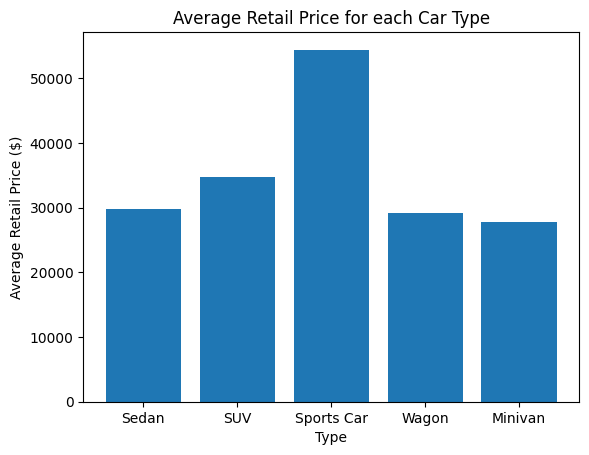

In [108]:
plt.bar(cars['Type'].unique(), [Avg_Sedan_prices, Avg_SUV_prices, Avg_Sports_Car_prices, Avg_Wagon_prices, Avg_Minivan_prices])
plt.title('Average Retail Price for each Car Type')
plt.xlabel('Type')
plt.ylabel('Average Retail Price ($)')

This data shows that on average, sports cars have a significantly higher retail price compared to other cars. Additionally, the bar graph illustrates that the average retail price for Sedans, SUVs, Wagons, and Minivans are around $30,000. This suggests that sports cars are generally considered luxury vehicles, commanding a premium price in the market compared to other types of cars.

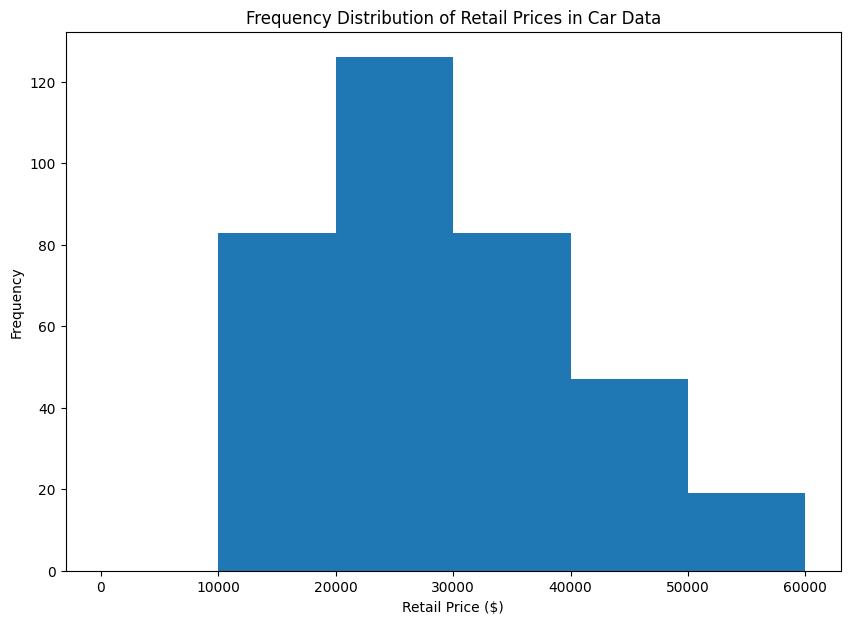

In [109]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(cars['Retail Price'], bins = [0, 10000, 20000, 30000, 40000, 50000, 60000])
plt.xlabel("Retail Price ($)")
plt.ylabel("Frequency")
plt.title('Frequency Distribution of Retail Prices in Car Data')
plt.show()

The histogram shows there is a concentration of cars within the price range of $20000 to $30000, as depicted by the tallest bar. Furthermore, from the $20000 to $30000 price range, there is an observable pattern of decreasing frequency as prices increase, suggesting a possible trend of decreasing market demand for more expensive vehicles.

Text(0, 0.5, 'Retail Price ($)')

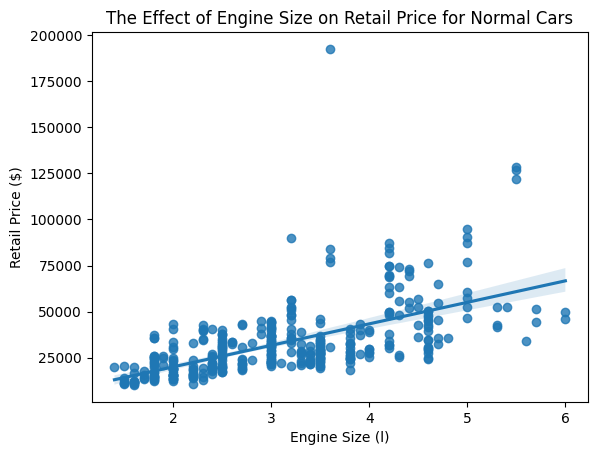

In [110]:
sns.regplot(x=cars['Engine Size (l)'], y=cars['Retail Price']);
plt.title('The Effect of Engine Size on Retail Price for Normal Cars')
plt.xlabel('Engine Size (l)')
plt.ylabel('Retail Price ($)')



Text(0, 0.5, 'Price (USD) in millions')

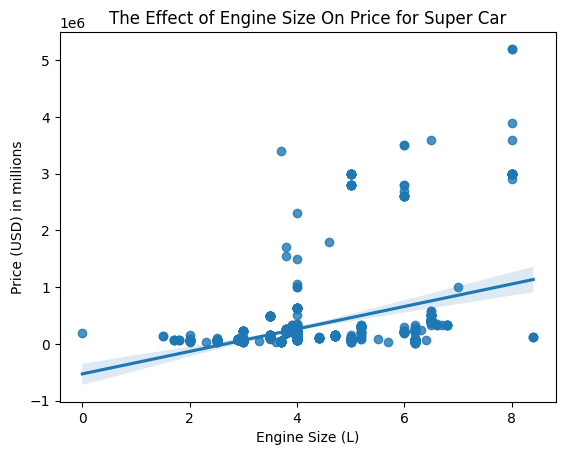

In [111]:
data["Engine Size"] = data["Engine Size (L)"].astype(float)
sns.regplot(x=data['Engine Size'], y=data['price']);
plt.title('The Effect of Engine Size On Price for Super Car')
plt.xlabel('Engine Size (L)')
plt.ylabel('Price (USD) in millions')

The visualization of the frequency distribution of retail prices in the car data reveals an increasing trend between engine size and retail price. We observe that as the engine size tends to increase, there is a corresponding rise in the retail price of cars. This observed trend suggests that larger engine sizes, which often translate to higher performance capabilities and more power, are associated with higher-priced vehicles in the market.

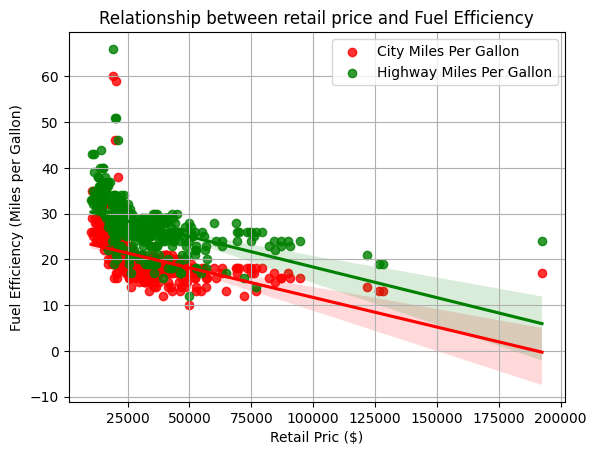

In [112]:
sns.regplot(x=cars['Retail Price'], y=cars['City Miles Per Gallon'], label = "City Miles Per Gallon", color = "red")
sns.regplot(x=cars['Retail Price'], y=cars['Highway Miles Per Gallon'], label = "Highway Miles Per Gallon", color = "green")
plt.title('Relationship between retail price and Fuel Efficiency')
plt.xlabel('Retail Pric ($)')
plt.ylabel('Fuel Efficiency (Miles per Gallon)')
plt.legend()
plt.grid()

The paradoxical relationship is observed between retail price and fuel efficiency (city miles per gallon and highway miles per gallon). As the retail price of cars increased, one might intuitively expect that higher-priced vehicles would feature more advanced and efficient technologies, leading to better fuel efficiency. However, the data presents a paradox, indicating that higher-priced cars tend to have lower fuel efficiency both in city driving conditions and on highways.

Super Car Data

Text(0.5, 1.0, 'Average Price for Super Car Manufacturers')

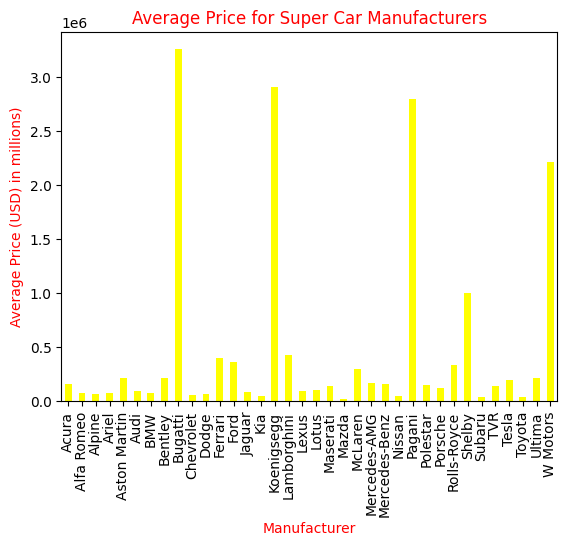

In [113]:
df = pd.DataFrame({'Manufacturer': data["Manufacturer"],
                   'price': data["price"]})

mean_values = df.groupby('Manufacturer')['price'].mean()
new_means = []

for i in range(len(mean_values)):
  new_means.append(mean_values[i])

df.groupby("Manufacturer")["price"].mean().plot(kind='bar',rot=90, color="yellow")
plt.xlabel('Manufacturer', color = "red")
plt.ylabel('Average Price (USD) in millions)', color = "red")
plt.title("Average Price for Super Car Manufacturers", color = "red")

This graphs shows the average prices of each listed unique car manufacturer. Although brands like Ferraris and Lamborghinis are well known, we see that other brands like Koenigseggs, Paganis, and Bugattis have a significantly expensive average cost.

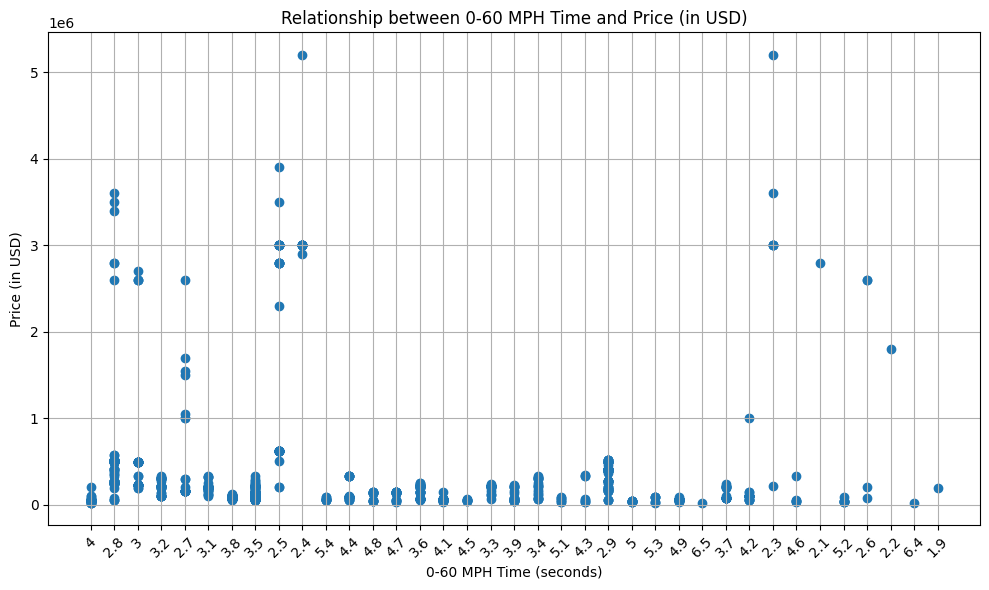

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(x=data["0-60 MPH Time (seconds)"], y=data["price"])
plt.title('Relationship between 0-60 MPH Time and Price (in USD)')
plt.xlabel('0-60 MPH Time (seconds)')
plt.ylabel('Price (in USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()



there does not seem to be a clear correlation between the two factors (price and 0-60 mph). The price, in millions of dollars, can be seen as more impacted by other factors such as marketing and asthetics rather than just purly on how quick the car can go from 0-60

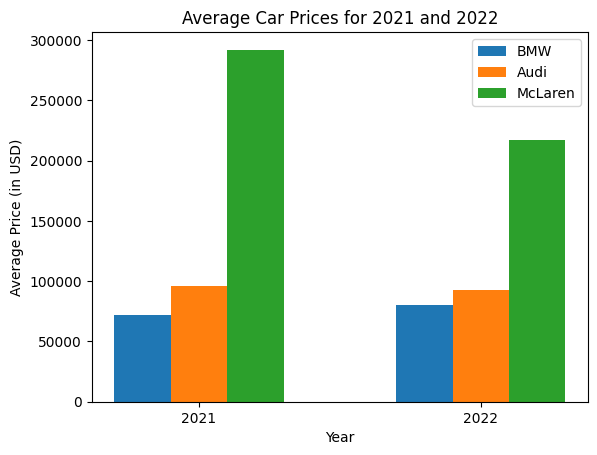

In [115]:
def create_bar_graph_for_average_car_price_2021_2022(csv_file):
    df = pd.read_csv(csv_file,encoding="latin-1")
    df['Price (in USD)'] = df['Price (in USD)'].apply(remove_commas)
    bmw_data = df[df['Car Make'] == 'BMW']
    audi_data = df[df['Car Make'] == 'Audi']
    mclaren_data = df[df['Car Make'] == 'McLaren']
    bmw_data_2021 = bmw_data[bmw_data['Year'] == 2021]
    bmw_data_2022 = bmw_data[bmw_data['Year'] == 2022]
    audi_data_2021 = audi_data[audi_data['Year'] == 2021]
    audi_data_2022 = audi_data[audi_data['Year'] == 2022]
    mclaren_data_2021 = mclaren_data[mclaren_data['Year'] == 2021]
    mclaren_data_2022 = mclaren_data[mclaren_data['Year'] == 2022]
    bmw_avg_2021 = np.mean(bmw_data_2021['Price (in USD)'])
    bmw_avg_2022 = np.mean(bmw_data_2022['Price (in USD)'])
    audi_avg_2021 = np.mean(audi_data_2021['Price (in USD)'])
    audi_avg_2022 = np.mean(audi_data_2022['Price (in USD)'])
    mclaren_avg_2021 = np.mean(mclaren_data_2021['Price (in USD)'])
    mclaren_avg_2022 = np.mean(mclaren_data_2022['Price (in USD)'])
    years = ['2021', '2022']
    bmw_avg = [bmw_avg_2021, bmw_avg_2022]
    audi_avg = [audi_avg_2021, audi_avg_2022]
    mclaren_avg = [mclaren_avg_2021, mclaren_avg_2022]
    bar_width = 0.2
    index = np.arange(len(years))
    plt.bar(index, bmw_avg, bar_width, label='BMW')
    plt.bar(index + bar_width, audi_avg, bar_width, label='Audi')
    plt.bar(index + 2*bar_width, mclaren_avg, bar_width, label='McLaren')
    plt.title('Average Car Prices for 2021 and 2022')
    plt.xlabel('Year')
    plt.ylabel('Average Price (in USD)')
    plt.xticks(index + bar_width, years)
    plt.legend()
    plt.show()
create_bar_graph_for_average_car_price_2021_2022('D://Sport car price.csv')



during the 1 year the price of the car stayed relatively the same. However, the one noticible difference is seen in the higher class car McLaren. One possible reason for this is that higher end cars are less in demand as a result of a worsening ecomony and the inflaction during these 2 years

## Model 1

In [ ]:
wandb.init( project="cars",entity="lmhastros")
data2=pd.read_csv("D://CARS_1.csv")
data2=data2.dropna(axis=0)
data2=data2[data2["transmission_type"]!="Electric"]
data2["price"]=(data2["starting_price"]+data2["ending_price"])/200000
train=data2[["seating_capacity","fuel_tank_capacity","max_torque_nm","max_torque_rpm","max_power_bhp","max_power_rp","price"]].astype(float)
from torch.utils.data import Dataset,DataLoader
class MyDataset(Dataset):
    def __init__(self,_data):
        self.data=_data
        self.len=self.data.shape[0]
        self.x_data=torch.Tensor(self.data.iloc[:,:-1].values)
        self.y_data=torch.Tensor(self.data.iloc[:,-1:].values)
    def __getitem__(self,index):
        return self.x_data[index],self.y_data[index]
    def __len__(self):
        return self.len
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.net=nn.Sequential(
            nn.Linear(6,50),
            nn.PReLU(),
            nn.Linear(50,200),
            nn.PReLU(),
            nn.Linear(200,400),
            nn.PReLU(),
            nn.Linear(400,200),
            nn.PReLU(),
            nn.Linear(200,40),
            nn.PReLU(),
            nn.Linear(40,1)
        )
    def forward(self,x):
        return self.net(x)
model=Model().to("cuda")
criterion=nn.MSELoss()
optimiser=torch.optim.Adam(model.parameters(),lr=0.00001)
train_data=MyDataset(train)
train_loader=DataLoader(dataset=train_data,batch_size=32)
for epoch in range(100000):
    for i,data in enumerate(train_loader,0):
        _input,label=data
        _input=_input.to("cuda")
        label=label.to("cuda")
        y_pred=model(_input)
        loss=criterion(y_pred,label)
        #print(i,y_pred,label,loss)
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        wandb.log({"loss":loss.item()})

Text(0, 0.5, 'price')

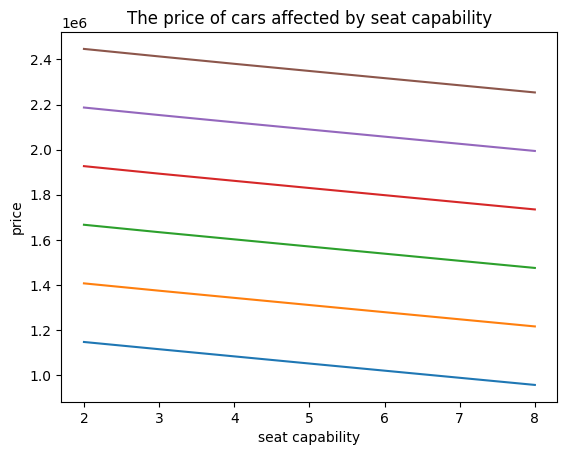

In [117]:
for j in range(5,11):
    result=[]
    for i in range(2,9):
        #test=torch.Tensor([i,70,960,4000,780,7100])
        test=torch.Tensor([i,10*j,100*j,500*j,70*j,700*j])
        test=test.to("cuda")
        result.append(model(test).item()*10000)
    plt.plot(np.arange(2,9),result)

plt.title("The price of cars affected by seat capability")
plt.xlabel("seat capability")
plt.ylabel("price")

the different lines represent cars of different performance levels, x-axis is number of seats and y-axis is price. We can see that no matter the level of the car, the model presents a linear decrease of price when seating capability increases. This might be because the more seats a car has, the more it is facing family customers and practical uses, while sport cars normally has less seats. Another reason is that while Horsepower/fuel tank capability stays constant, more seats means more height, and thus worse performance.

Text(0, 0.5, 'price')

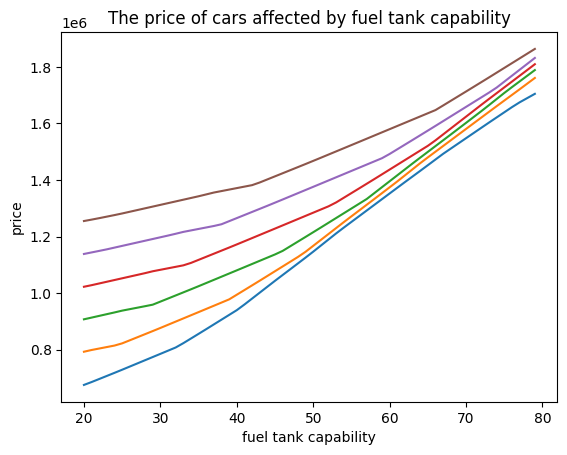

In [118]:
plt.ylabel("price")
for j in range(5, 11):
    result = []
    for i in range(20, 80):
        test = torch.Tensor([j - 3, i, 100 * j, 500 * j, 70 * j, 700 * j])
        test = test.to("cuda")
        result.append(model(test).item() * 10000)
    plt.plot(np.arange(20, 80), result)

plt.title("The price of cars affected by fuel tank capability")
plt.xlabel("fuel tank capability")
plt.ylabel("price")

This graph shows the relation between fuel tank capability and price. Different lines in the graph represent cars of different performance. The lower the line is in the y-axis(the price), apparently the car it points to is more low-end. we can observe that while all prices tend to be increasing with the fuel tank capability, which agrees with common sense, low-end cars has an obvious increase in rate of change when fuel tank rises to 50 and 80. This might be caused by the relative importance of continuation of the journey in economy/family cars compared to high-end cars.

Text(0, 0.5, 'price')

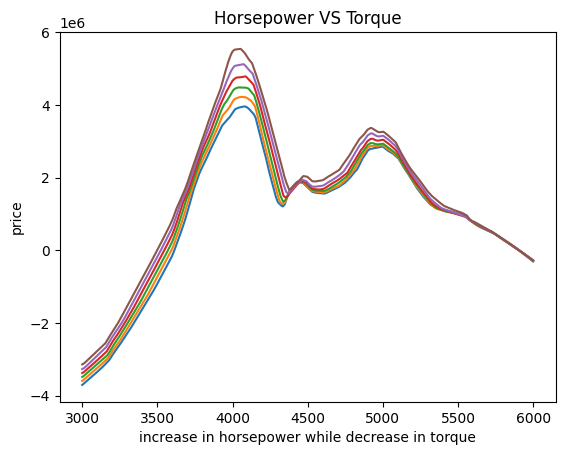

In [119]:
for j in range(5,11):
    result=[]
    for i in range(3000,6000):
        test=torch.Tensor([j-3,j*10,1000-i/10,5500-i/2,i/10,i])
        test=test.to("cuda")
        result.append(model(test).item()*10000)
    plt.plot(np.arange(3000,6000),result)
plt.title("Horsepower VS Torque")
plt.xlabel("increase in horsepower while decrease in torque")
plt.ylabel("price")

There is an interesting debate in the cars industry: do more horsepower and less torque, or the opposite? With the ML model, we are able to look into it. In this graph, for each line(representing car in a different level), torque starts to be above average while horsepower lower than average. As x value increases, horsepower increase and torque decreases at the same rate so that their sum remains constant. The y value, price, is used to evaluate the car's performance. As seen in the graph, sacrificing too much horsepower for torque, or the other way around, is the wrong thing to do, making the car valueless. Also, we can clearly see a peak value at x value 4000, which means horsepower 4000rp and torque 600N/m. This might be the right balance between horsepower and torque.

## Model 2

In [120]:
wandb.init( project="super_cars",entity="lmhastros")
data=pd.read_csv("D://Sport car price.csv",encoding="latin-1")
def to_num(s):
    ans=""
    for i in s:
        if i!=",":
            ans+=i
    return int(ans)

def to_num_2(s):
    if s[-1]=="+":
        s=s[:-1]
    ans=""
    for i in s:
        if i!=",":
            ans+=i
    return ans

def to_num_3(s):
    if str(s).isnumeric()!=True:
        return
    return s
def love(s):
    if "Electric" in str(s) or "Hybrid" in str(s) or "-" in str(s):
        return
    else:
        return s

class MyDataset(Dataset):
    def __init__(self,_data):
        self.data=_data
        self.len=self.data.shape[0]
        self.x_data=torch.Tensor(self.data.iloc[:,:-1].values)
        self.y_data=torch.Tensor(self.data.iloc[:,-1:].values)
    def __getitem__(self,index):
        return self.x_data[index],self.y_data[index]
    def __len__(self):
        return self.len

class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.net=nn.Sequential(
            nn.Linear(4,50),
            nn.PReLU(),
            nn.Linear(50,200),
            nn.PReLU(),
            nn.Linear(200,400),
            nn.PReLU(),
            nn.Linear(400,200),
            nn.PReLU(),
            nn.Linear(200,40),
            nn.PReLU(),
            nn.Linear(40,1),
        )
    def forward(self,x):
        return self.net(x)

data["price"]=data["Price (in USD)"].apply(to_num)
data["price_degraded"]=data["price"]/1000000
data["engine"]=data["Engine Size (L)"].apply(love)
data["horse"]=data["Horsepower"].apply(to_num_2)
data["torque"]=data["Torque (lb-ft)"].apply(to_num_3)
data=data.dropna(axis=0)
train=data[["engine","horse","torque","0-60 MPH Time (seconds)","price_degraded"]].astype(float)
model=Model().to("cuda")
criterion=nn.MSELoss()
optimiser=torch.optim.Adam(model.parameters(),lr=0.000001)
train_data=MyDataset(train)
train_loader=DataLoader(dataset=train_data,batch_size=8)

for epoch in range(200):
    for i,data in enumerate(train_loader,0):
        _input,label=data
        _input=_input.to("cuda")
        label=label.to("cuda")
        y_pred=model(_input)
        loss=criterion(y_pred,label)
        #print(i,y_pred,label,loss)
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        wandb.log({"loss":loss.item()})

loss,▅█▇▆▁▁▁▂▂▂▄▄▄▁▁▁▂▂▂▄▃▃▁▁▁▂▂▂▃▃▃▁▁▁▂▂▂▃▃▃
loss,214.21304


Text(0, 0.5, 'price')

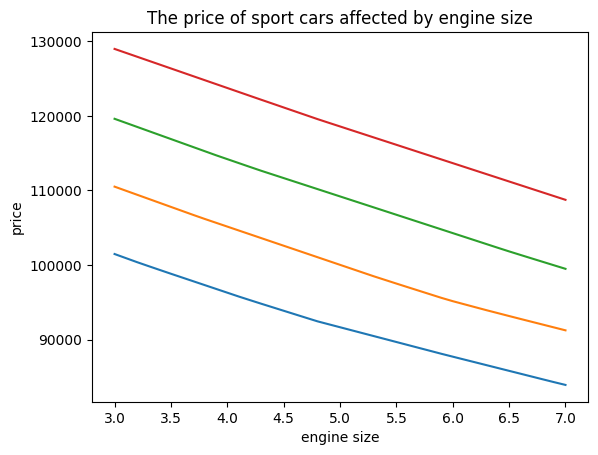

In [121]:
for j in range(3,7):
    result=[]
    label=[]
    i=3
    while i<=7:
        test=torch.Tensor([i,100*j,100*j,j-1])
        test=test.to("cuda")
        result.append(model(test).item()*1000000)
        label.append(i)
        i+=0.1
    plt.plot(label,result)

plt.title("The price of sport cars affected by engine size")
plt.xlabel("engine size")
plt.ylabel("price")

Text(0, 0.5, 'price')

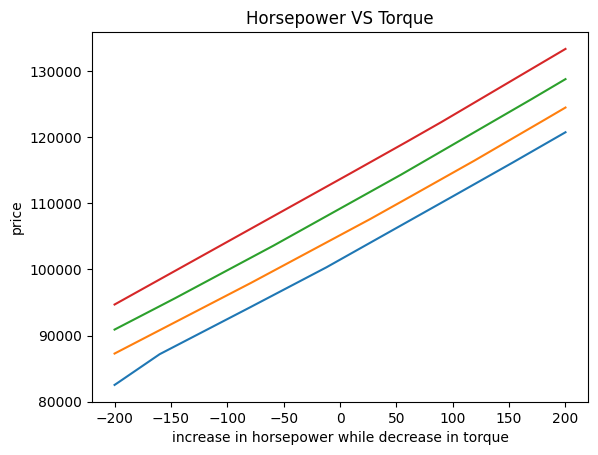

In [122]:
for j in range(3,7):
    result=[]
    for i in range(-200,201):
        test=torch.Tensor([j,100*j+i,100*j+i,j-1])
        test=test.to("cuda")
        result.append(model(test).item()*1000000)
    plt.plot(np.arange(-200,201),result)
plt.title("Horsepower VS Torque")
plt.xlabel("increase in horsepower while decrease in torque")
plt.ylabel("price")